In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl
from sklearn import linear_model
import seaborn as sns

import math


In [2]:
data = pd.read_csv("new_accounts.csv")
data.head(5)

,ranking,username,categories,engagement,engagement_activity,followers,following,total_posts,channel_associated_on_bio,time_on_app_years,latest_post,post_type,likes_per_post,comments_per_post,partnership_posts,date_post
0,31,@sameragi,"Education, 'Coaching'",0,8.085143,1400000,2735,2628,1,10,1,picture,78300,375,0,10/11/2022
1,31,@sameragi,"Education, 'Coaching'",0,8.085143,1400000,2735,2628,1,10,2,video,32200,56,0,9/11/2022
2,31,@sameragi,"Education, 'Coaching'",0,8.085143,1400000,2735,2628,1,10,3,caroussel,2224,37,0,9/11/2022
3,32,@luisapeleja,"Fashion', 'Lifestyle', 'Modeling'",0,2.223810,126000,1470,8529,1,11,1,video,524,12,0,10/11/2022
4,32,@luisapeleja,"Fashion', 'Lifestyle', 'Modeling'",0,2.223810,126000,1470,8529,1,11,2,caroussel,814,2,0,7/11/2022


In [3]:
print(data["engagement_activity"].max())
print(data["engagement_activity"].min())
print(data["engagement_activity"].mean())
print(data["engagement_activity"].median())


25.99928571
0.742134831
9.769355539599998
8.122393822


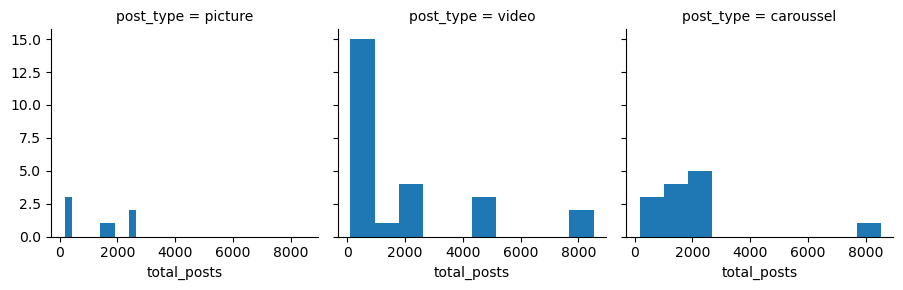

In [4]:
graph = sns.FacetGrid(data, col='post_type')
graph.map(plt.hist, 'total_posts')
plt.show()

In [5]:
print(data["post_type"].value_counts())
print(data["total_posts"].value_counts())

video        25
caroussel    13
picture       7
Name: post_type, dtype: int64
2628    3
8529    3
486     3
4959    3
603     3
1511    3
2286    3
2585    3
313     3
1626    3
112     3
738     3
317     3
194     3
1873    3
Name: total_posts, dtype: int64


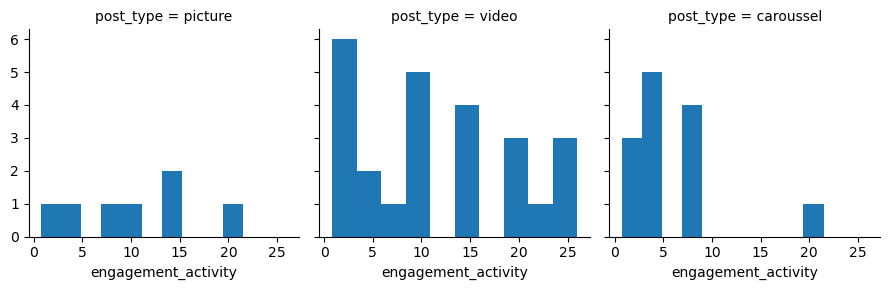

In [6]:
graph2 = sns.FacetGrid(data, col='post_type')
graph2.map(plt.hist, 'engagement_activity')
plt.show()

c:\Users\Cristiana\anaconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


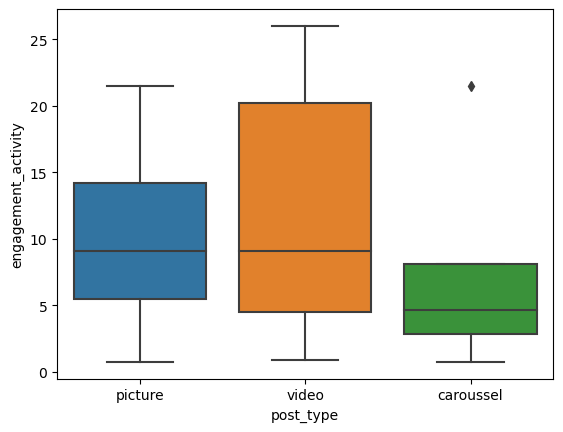

In [46]:
sns.boxplot(data.post_type, data.engagement_activity)
plt.show()

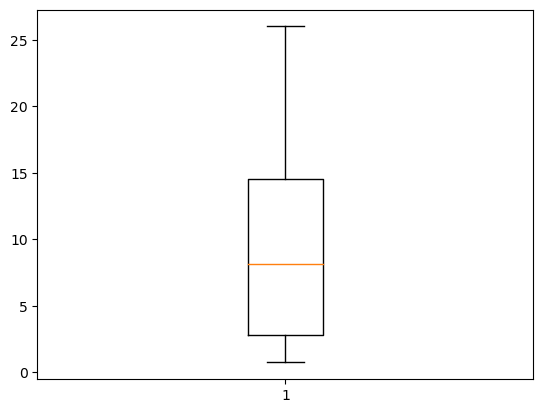

In [47]:
plt.boxplot(data.engagement_activity)
plt.show()

c:\Users\Cristiana\anaconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


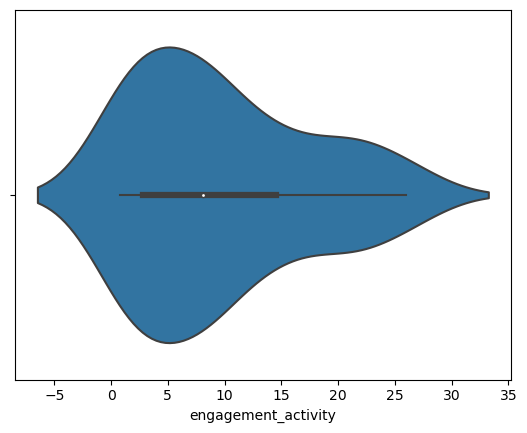

In [48]:
sns.violinplot(data.engagement_activity)
plt.show()

In [ ]:
# sns.pairplot(data)
# plt.show()


In [15]:
data.columns

Index(['ranking', 'alias', 'categories', 'engagement', 'followers',
       'following', 'total_posts', 'channel_associated_on_bio',
       'time_on_app_years', 'latest_post', 'post_type', 'likes_per_post',
       'comments_per_post', 'partnership_posts', 'date_post'],
      dtype='object')

In [18]:
data.dtypes
# data["date_post"].astype("datetime64")

ranking                       int64
alias                        object
categories                   object
engagement                    int64
followers                     int64
following                     int64
total_posts                   int64
channel_associated_on_bio     int64
time_on_app_years             int64
latest_post                   int64
post_type                    object
likes_per_post                int64
comments_per_post             int64
partnership_posts             int64
date_post                    object
dtype: object

In [19]:
# average_comments_per_post = data.pivot_table(index=["ranking", "alias"], values=["comments_per_post"], aggfunc= {"comments_per_post" : ["sum", "mean", "median", "min", "max"]})
# average_comments_per_post
# average_comments_per_post
# # create new columns then 

comments_per_post                                   
                                     max         mean   median   min    sum
ranking alias                                                              
31      sameragi                     375   156.000000     56.0    37    468
32      luisapeleja                   22    12.000000     12.0     2     36
33      anachiyo                    1056   619.666667    563.0   240   1859
34      amandafitas                  247    96.333333     33.0     9    289
35      lih.santinello               246   111.666667     61.0    28    335
36      brunabiancardi               224   173.000000    204.0    91    519
37      valenbandeira                273   191.333333    223.0    78    574
38      pedroscooby                 1123   701.666667    527.0   455   2105
39      iampauloandre              10100  8289.333333  10000.0  4768  24868
40      joanabalaguer                 27    17.000000     13.0    11     51
41      mamedelucas                 1641  1439.666667   1340.0  1338   4319
42      nocasomila                  3446  1816.000000   1520.0   482   5448
43      voagarota                     69    42.666667     47.0    12    128
44      xandecoelho                   72    48.000000     39.0    33    144
45      leopeleja                     36    26.333333     30.0    13     79

In [20]:
# average_comments_per_post.columns

MultiIndex([('comments_per_post',    'max'),
            ('comments_per_post',   'mean'),
            ('comments_per_post', 'median'),
            ('comments_per_post',    'min'),
            ('comments_per_post',    'sum')],
           )

In [21]:
# average_comments_per_post.columns = average_comments_per_post.columns.droplevel()

In [22]:
# average_comments_per_post.columns = ["max_comment", "mean_comment", "median_comment", "min_comment", "sum_comment"]

In [24]:
# average_comments_per_post.loc[31]["sum_comment"]

alias
sameragi    468
Name: sum_comment, dtype: int64

In [25]:
# average_comments_per_post

,,max_comment,mean_comment,median_comment,min_comment,sum_comment
ranking,alias,,,,,
31,sameragi,375,156.000000,56.0,37,468
32,luisapeleja,22,12.000000,12.0,2,36
33,anachiyo,1056,619.666667,563.0,240,1859
34,amandafitas,247,96.333333,33.0,9,289
35,lih.santinello,246,111.666667,61.0,28,335
36,brunabiancardi,224,173.000000,204.0,91,519
37,valenbandeira,273,191.333333,223.0,78,574
38,pedroscooby,1123,701.666667,527.0,455,2105
39,iampauloandre,10100,8289.333333,10000.0,4768,24868


In [26]:
# average_likes_per_post = data.pivot_table(index=["ranking", "alias"], values=["likes_per_post"], aggfunc= {"likes_per_post" : ["sum", "mean", "median", "min", "max"]})
# average_likes_per_post
# # create new columns then 

likes_per_post                                        
                                  max           mean    median    min     sum
ranking alias                                                                
31      sameragi                78300   37574.666667   32200.0   2224  112724
32      luisapeleja              1428     922.000000     814.0    524    2766
33      anachiyo                29800   23300.000000   28800.0  11300   69900
34      amandafitas             10500    5868.666667    6952.0    154   17606
35      lih.santinello           3168    2559.666667    2625.0   1886    7679
36      brunabiancardi          30400   26700.000000   26200.0  23500   80100
37      valenbandeira           17600   13833.333333   13600.0  10300   41500
38      pedroscooby             88600   58866.666667   51700.0  36300  176600
39      iampauloandre          238000  141066.666667  106000.0  79200  423200
40      joanabalaguer             637     423.333333     385.0    248    1270
41      mamedelucas            115000   79466.666667  111000.0  12400  238400
42      nocasomila              63100   34583.000000   36200.0   4449  103749
43      voagarota                1200     871.000000     882.0    531    2613
44      xandecoelho              1637    1054.000000     873.0    652    3162
45      leopeleja                 232     213.000000     217.0    190     639

In [27]:
# average_likes_per_post.columns

MultiIndex([('likes_per_post',    'max'),
            ('likes_per_post',   'mean'),
            ('likes_per_post', 'median'),
            ('likes_per_post',    'min'),
            ('likes_per_post',    'sum')],
           )

In [28]:
# average_likes_per_post.columns = average_likes_per_post.columns.droplevel()

In [29]:
# average_likes_per_post.columns = ["max_like", "mean_like", "median_like", "min_like", "sum_like"]

In [30]:
# average_likes_per_post.loc[31]["sum_like"]

alias
sameragi    112724
Name: sum_like, dtype: int64

In [31]:
# engagement = (average_likes_per_post.loc[31]["sum_like"] + average_comments_per_post.loc[31]["sum_comment"]) * 100 / (data.loc[31]["followers"])
# engagement

alias
sameragi    9.432667
dtype: float64

In [32]:
# sum_of_likes = []

# for number in average_likes_per_post["sum_like"]:
#     sum_of_likes.append(number)

# sum_of_likes

[112724,
 2766,
 69900,
 17606,
 7679,
 80100,
 41500,
 176600,
 423200,
 1270,
 238400,
 103749,
 2613,
 3162,
 639]

In [33]:
# sum_of_comments = []

# for number in average_comments_per_post["sum_comment"]:
#     sum_of_comments.append(number)

# sum_of_comments

[468, 36, 1859, 289, 335, 519, 574, 2105, 24868, 51, 4319, 5448, 128, 144, 79]

In [34]:
# likes_and_comments = [like + comment for like, comment in zip(sum_of_likes, sum_of_comments)]
# likes_and_comments

[113192,
 2802,
 71759,
 17895,
 8014,
 80619,
 42074,
 178705,
 448068,
 1321,
 242719,
 109197,
 2741,
 3306,
 718]

In [35]:
# total_followers = data.pivot_table(index=["ranking","alias"], values=["followers"], aggfunc= {"followers" : ["mean"]})
# total_followers

,,followers
,,mean
ranking,alias,
31,sameragi,1400000.0
32,luisapeleja,126000.0
33,anachiyo,493000.0
34,amandafitas,2100000.0
35,lih.santinello,88400.0
36,brunabiancardi,1800000.0
37,valenbandeira,518000.0
38,pedroscooby,6300000.0


In [36]:
# total_followers.columns

MultiIndex([('followers', 'mean')],
           )

In [37]:
# total_followers.columns = total_followers.columns.droplevel()

In [38]:
# total_followers.columns = ["total_followers"]

In [39]:
# total_followers

,,total_followers
ranking,alias,
31,sameragi,1400000.0
32,luisapeleja,126000.0
33,anachiyo,493000.0
34,amandafitas,2100000.0
35,lih.santinello,88400.0
36,brunabiancardi,1800000.0
37,valenbandeira,518000.0
38,pedroscooby,6300000.0
39,iampauloandre,9700000.0


In [40]:
# followers_multiplied = []

# for number in total_followers["total_followers"]:
#     followers_multiplied.append(number)

# followers_multiplied

[1400000.0,
 126000.0,
 493000.0,
 2100000.0,
 88400.0,
 1800000.0,
 518000.0,
 6300000.0,
 9700000.0,
 178000.0,
 1200000.0,
 420000.0,
 19300.0,
 15400.0,
 7922.0]

In [41]:
# engagement = [(likes_comments * 100) / followers for likes_comments, followers in zip(likes_and_comments, followers_multiplied)]
# engagement

[8.085142857142857,
 2.223809523809524,
 14.555578093306288,
 0.8521428571428571,
 9.065610859728507,
 4.478833333333333,
 8.122393822393823,
 2.8365873015873015,
 4.619257731958763,
 0.7421348314606742,
 20.226583333333334,
 25.999285714285715,
 14.202072538860104,
 21.467532467532468,
 9.063367836404948]

In [ ]:
# data["engagement_activity"] = np.array(engagement)
# data

# did manually

In [7]:
data.skew()

# checking if negative or positive skew 

C:\Users\Cristiana\AppData\Local\Temp\ipykernel_10172\846527599.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


ranking                      0.000000
engagement                   0.000000
engagement_activity          0.724699
followers                    2.210268
following                    1.075690
total_posts                  1.960997
channel_associated_on_bio    0.422463
time_on_app_years           -0.501124
latest_post                  0.000000
likes_per_post               2.699545
comments_per_post            3.567404
partnership_posts            1.552228
dtype: float64

c:\Users\Cristiana\anaconda3\envs\ironhack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


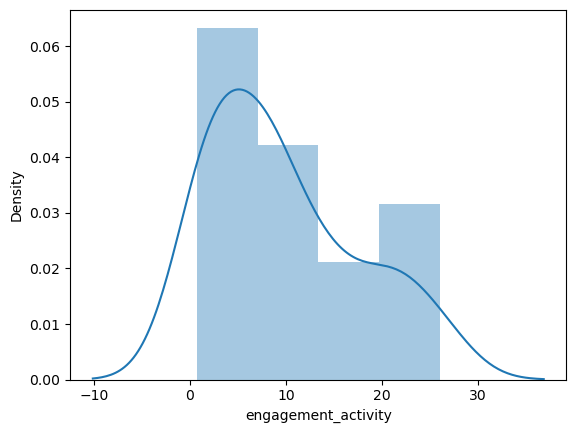

In [49]:
sns.distplot(data["engagement_activity"])
plt.show()

c:\Users\Cristiana\anaconda3\envs\ironhack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


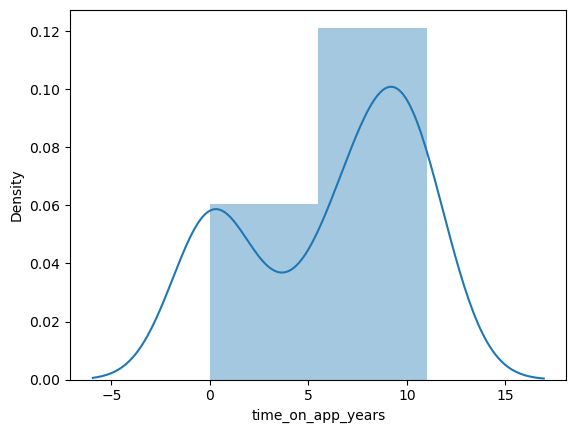

In [50]:
sns.distplot(data["time_on_app_years"])
plt.show()

c:\Users\Cristiana\anaconda3\envs\ironhack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


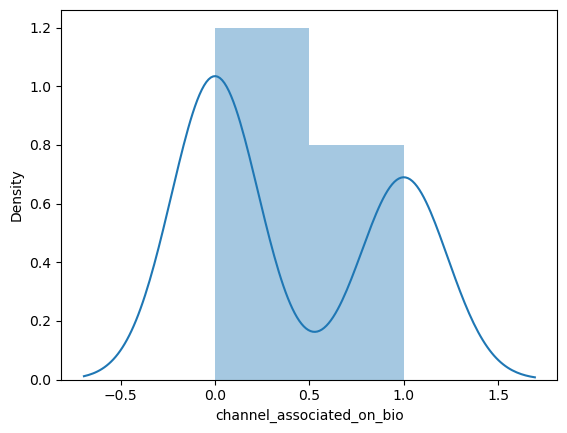

In [51]:
sns.distplot(data["channel_associated_on_bio"])
plt.show()

c:\Users\Cristiana\anaconda3\envs\ironhack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


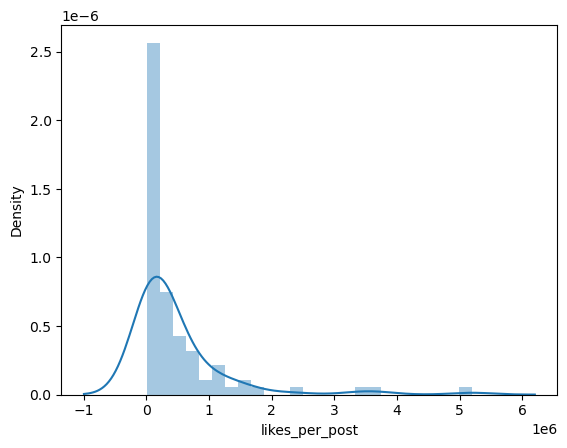

In [16]:
sns.distplot(data["likes_per_post"])
plt.show()

# correlations

In [52]:
data.columns

Index(['ranking', 'username', 'categories', 'engagement',
       'engagement_activity', 'followers', 'following', 'total_posts',
       'channel_associated_on_bio', 'time_on_app_years', 'latest_post',
       'post_type', 'likes_per_post', 'comments_per_post', 'partnership_posts',
       'date_post'],
      dtype='object')

In [53]:
data.select_dtypes('number').head(5)

,ranking,engagement,engagement_activity,followers,following,total_posts,channel_associated_on_bio,time_on_app_years,latest_post,likes_per_post,comments_per_post,partnership_posts
0,31,0,8.085143,1400000,2735,2628,1,10,1,78300,375,0
1,31,0,8.085143,1400000,2735,2628,1,10,2,32200,56,0
2,31,0,8.085143,1400000,2735,2628,1,10,3,2224,37,0
3,32,0,2.223810,126000,1470,8529,1,11,1,524,12,0
4,32,0,2.223810,126000,1470,8529,1,11,2,814,2,0


In [54]:
data[["engagement_activity", "followers", "following", "total_posts", "channel_associated_on_bio", "time_on_app_years", "likes_per_post", "comments_per_post", "partnership_posts"]].corr()


,engagement_activity,followers,following,total_posts,channel_associated_on_bio,time_on_app_years,likes_per_post,comments_per_post,partnership_posts
engagement_activity,1.000000,-0.346335,0.194949,-0.567275,-0.388676,-0.340283,0.017863,-0.008049,0.007548
followers,-0.346335,1.000000,-0.240386,-0.083946,0.253793,-0.112850,0.712118,0.765350,-0.009516
following,0.194949,-0.240386,1.000000,0.075209,-0.306283,0.172972,-0.160264,-0.232135,0.311630
total_posts,-0.567275,-0.083946,0.075209,1.000000,0.417246,0.381240,-0.247995,-0.258694,-0.138230
channel_associated_on_bio,-0.388676,0.253793,-0.306283,0.417246,1.000000,0.298575,0.283409,0.283392,-0.181444
time_on_app_years,-0.340283,-0.112850,0.172972,0.381240,0.298575,1.000000,-0.134507,0.091931,0.076846
likes_per_post,0.017863,0.712118,-0.160264,-0.247995,0.283409,-0.134507,1.000000,0.604165,0.098843
comments_per_post,-0.008049,0.765350,-0.232135,-0.258694,0.283392,0.091931,0.604165,1.000000,-0.041735
partnership_posts,0.007548,-0.009516,0.311630,-0.138230,-0.181444,0.076846,0.098843,-0.041735,1.000000


In [55]:
# heatmap 

plt.figure(figsize=(6,4))
sns.heatmap(data.corr())

<AxesSubplot:>

# covariances

In [56]:
print(data["engagement_activity"].cov(data["likes_per_post"]))
print(data["engagement_activity"].cov(data["comments_per_post"]))

# With a negative covariance, that means what we already noticed: 
# when one variable goes up, the other goes down. 

6340.114539181849
-136.61701159209557


# Spearman correlation 

Because we just care to know if one variable increase, what happens to the other 
does not increase, decrease, of affect it at all.
The magnitude of the influence is not important.

Ex.: I don't care to see if I study 10 more minutes, the grade increase 1 point on grade 
I care if I study more, I get better grades.

In [ ]:
# let's try to correlate number with number?

# examples
# followers with avg comments 
# followers with avg likes 
# followers with engagement 


# Logistic Regression Model 

In [57]:
data.columns

Index(['ranking', 'username', 'categories', 'engagement',
       'engagement_activity', 'followers', 'following', 'total_posts',
       'channel_associated_on_bio', 'time_on_app_years', 'latest_post',
       'post_type', 'likes_per_post', 'comments_per_post', 'partnership_posts',
       'date_post'],
      dtype='object')

In [58]:
data.sample(5)

,ranking,username,categories,engagement,engagement_activity,followers,following,total_posts,channel_associated_on_bio,time_on_app_years,latest_post,post_type,likes_per_post,comments_per_post,partnership_posts,date_post
29,40,@joanabalaguer,"Artist', 'Lifestyle', 'Business', 'Modeling'",0,0.742135,178000,204,1626,1,9,3,caroussel,637,27,0,2/11/2022
10,34,@amandafitas,"Education', 'Mental Health', 'Coaching'",0,0.852143,2100000,381,4959,1,7,2,video,154,9,0,9/11/2022
26,39,@iampauloandre,"Art', 'Sports', 'Modeling'",0,4.619258,9700000,572,313,1,9,3,caroussel,106000,10100,0,7/11/2022
9,34,@amandafitas,"Education', 'Mental Health', 'Coaching'",0,0.852143,2100000,381,4959,1,7,1,video,6952,33,0,9/11/2022
16,36,@brunabiancardi,"Lifestyle', 'Fashion', 'Modeling'",0,4.478833,1800000,715,1511,0,0,2,caroussel,26200,91,0,8/11/2022


In [51]:
X = data[['engagement_activity','followers', 'following', 'total_posts', 'likes_per_post', 'comments_per_post']]
y = data['channel_associated_on_bio']

# type of engagement will be generated by 2 bins based on : 
# from 0 to 5 : low engagement = 0 
# from 5 to 10 or higher : high engagement = 1 
# we will have to generate this new column 


X.head()

,followers,following,total_posts,likes_per_post,comments_per_post
0,15.2,854,2783,351000,4043
1,15.2,854,2783,401000,2538
2,15.2,854,2783,96600,1790
3,15.7,1805,3453,505000,3084
4,15.7,1805,3453,34500,763


In [52]:
#  create our model 

logistic = linear_model.LogisticRegression()

In [53]:
# train the model 

logistic.fit(X,y)

LogisticRegression()

In [54]:
# evaluate the model 

logistic.score(X,y)

# accuracy score : near 65%

0.6555555555555556

In [38]:
from sklearn.preprocessing import StandardScaler

# create the scaler 

scaler = StandardScaler()

# fit our data to the standard scaler 
scaler.fit(X)

# transform the data
scaler.transform(X)

array([[-0.04598378, -0.81270809, -0.77489864, -0.29396626,  0.56255384,
        -0.15366513, -0.11620895],
       [-0.04598378, -0.81270809, -0.77489864, -0.29396626,  0.56255384,
        -0.09253062, -0.26259818],
       [-0.04598378, -0.81270809, -0.77489864, -0.29396626,  0.56255384,
        -0.4647175 , -0.33535509],
       [-0.22436159, -0.7736981 ,  0.25495454, -0.07349156,  0.56255384,
         0.03462915, -0.20948953],
       [-0.22436159, -0.7736981 ,  0.25495454, -0.07349156,  0.56255384,
        -0.54064656, -0.43524994],
       [-0.22436159, -0.7736981 ,  0.25495454, -0.07349156,  0.56255384,
        -0.47290953, -0.44021064],
       [ 0.0165281 , -0.75809411, -1.54052029, -0.45685428,  0.56255384,
        -0.56974659, -0.48748317],
       [ 0.0165281 , -0.75809411, -1.54052029, -0.45685428,  0.56255384,
         0.48580182,  2.38913822],
       [ 0.0165281 , -0.75809411, -1.54052029, -0.45685428,  0.56255384,
        -0.49736333, -0.41560168],
       [ 0.2587529 , -0.7424

In [39]:
scaled_X = pd.DataFrame(scaler.transform(X), columns=X.columns)
scaled_X

,engagement_activity,followers,following,total_posts,time_on_app_years,likes_per_post,comments_per_post
0,-0.045984,-0.812708,-0.774899,-0.293966,0.562554,-0.153665,-0.116209
1,-0.045984,-0.812708,-0.774899,-0.293966,0.562554,-0.092531,-0.262598
2,-0.045984,-0.812708,-0.774899,-0.293966,0.562554,-0.464718,-0.335355
3,-0.224362,-0.773698,0.254955,-0.073492,0.562554,0.034629,-0.209490
4,-0.224362,-0.773698,0.254955,-0.073492,0.562554,-0.540647,-0.435250
...,...,...,...,...,...,...,...
85,-0.546617,2.557755,0.313432,-0.293308,0.324855,0.189911,0.013742
86,-0.546617,2.557755,0.313432,-0.293308,0.324855,-0.555319,-0.494195
87,-0.179991,2.940053,1.569615,0.498426,0.562554,0.084759,0.322861
88,-0.179991,2.940053,1.569615,0.498426,0.562554,1.128937,0.891202


# inserting new values : new instagram accounts 